In [1]:
import sys
print(sys.version)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:15:57) [MSC v.1916 64 bit (AMD64)]


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [4]:
def train_model(batch_size):
    model = build_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=5, batch_size=batch_size, validation_data=(test_images, test_labels), verbose=0)
    return history.history['val_loss'][-1]

In [5]:
batch_sizes = [4, 16, 64, 256, 1024]

In [6]:
for batch_size in batch_sizes:
    start_time = datetime.now()
    final_loss = train_model(batch_size)
    end_time = datetime.now()
    print(f'Batch Size: {batch_size}, Final Validation Loss: {final_loss}, Time: {end_time - start_time}')

Batch Size: 4, Final Validation Loss: 0.030982689931988716, Time: 0:05:55.403168
Batch Size: 16, Final Validation Loss: 0.026609472930431366, Time: 0:02:11.992091
Batch Size: 64, Final Validation Loss: 0.029549265280365944, Time: 0:01:16.173311
Batch Size: 256, Final Validation Loss: 0.04196875914931297, Time: 0:00:57.249151
Batch Size: 1024, Final Validation Loss: 0.05400163680315018, Time: 0:00:55.810477


In [7]:
data1_train = pd.read_csv('Dane1_train.csv', sep='\t')
data1_test = pd.read_csv('Dane1_test.csv', sep='\t')

data2 = pd.read_csv('Dane2.csv', sep='\t')

data3 = pd.read_csv('Data3.csv', sep='\t')

In [8]:
def train_evaluate_model(X_train, y_train, X_test, y_test, activation, solver, hidden_layer_sizes):
    model = MLPRegressor(activation=activation, solver=solver, hidden_layer_sizes=hidden_layer_sizes, random_state=42)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return model, train_score, test_score

In [9]:
X1_train, y1_train = data1_train[['x']], data1_train['y']
X1_test, y1_test = data1_test[['x']], data1_test['y']

X2, y2 = data2[['x1', 'x2']], data2['y']

X3, y3 = data3[['x1', 'x2', 'x3', 'x4']], data3['klasa']

In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_train, y1_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

X2_scaled = scaler.fit_transform(X2)
X3_scaled = scaler.fit_transform(X3)

In [11]:
activations = ['relu', 'tanh']
solvers = ['adam', 'sgd']
hidden_layer_sizes_values = [(10,), (20,), (30,)]

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


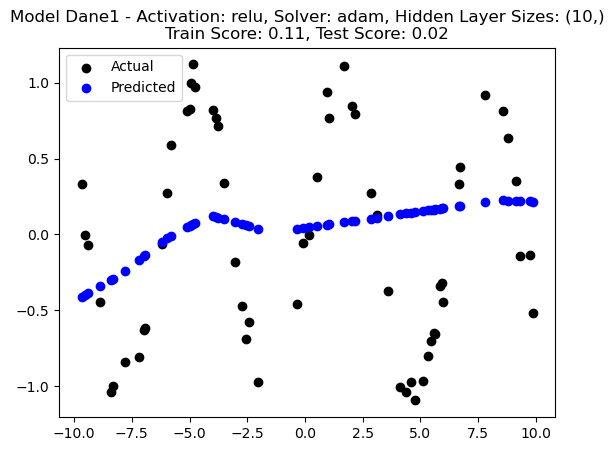

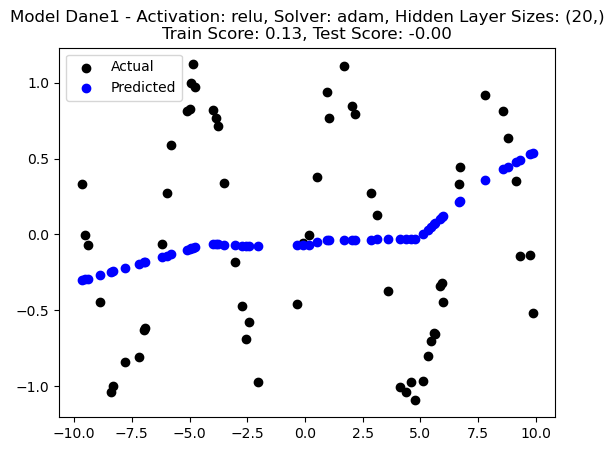

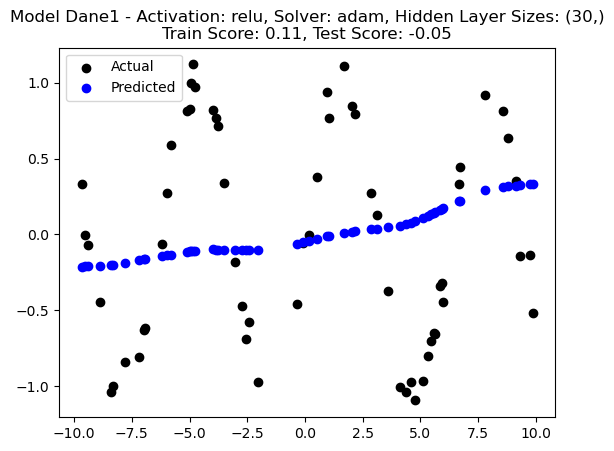

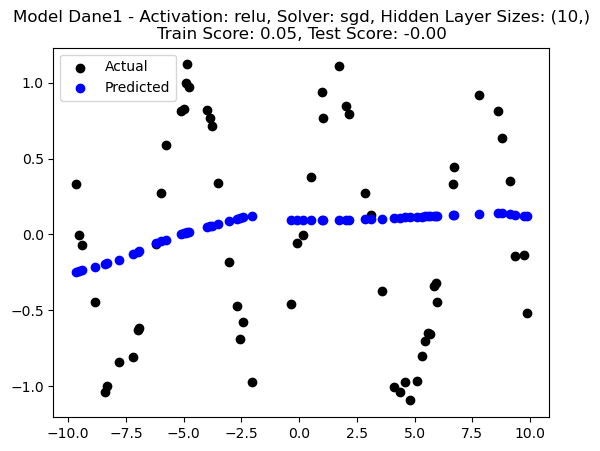

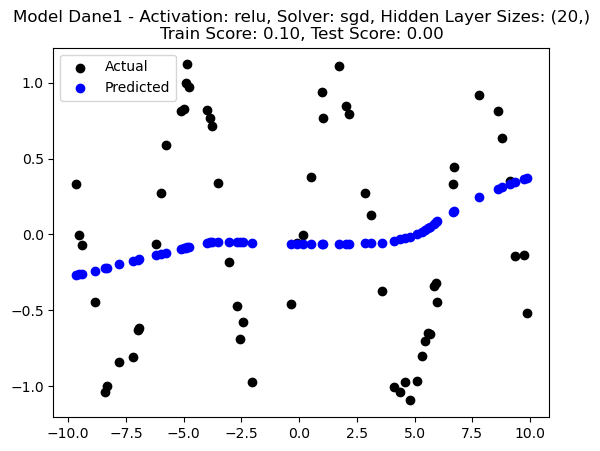

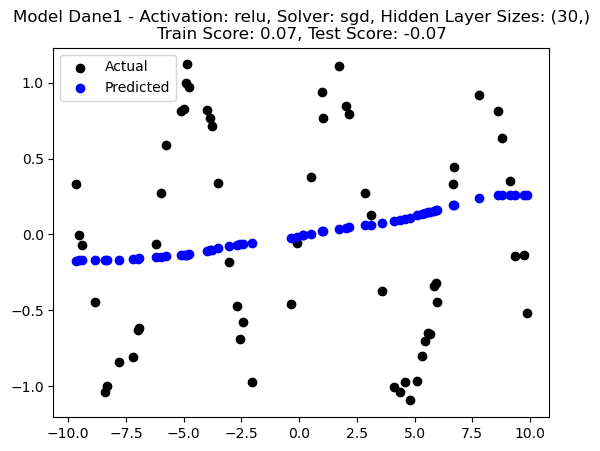

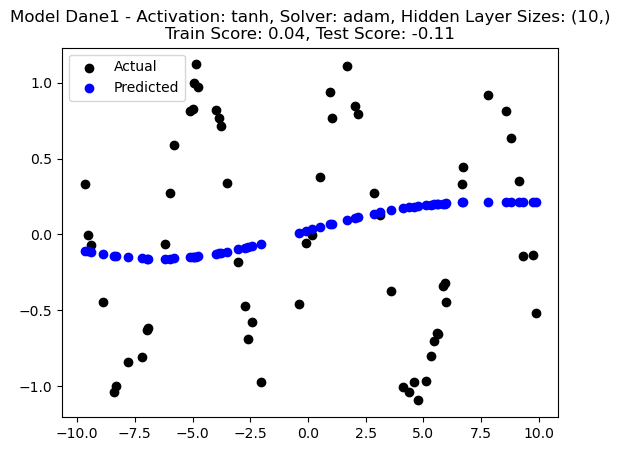

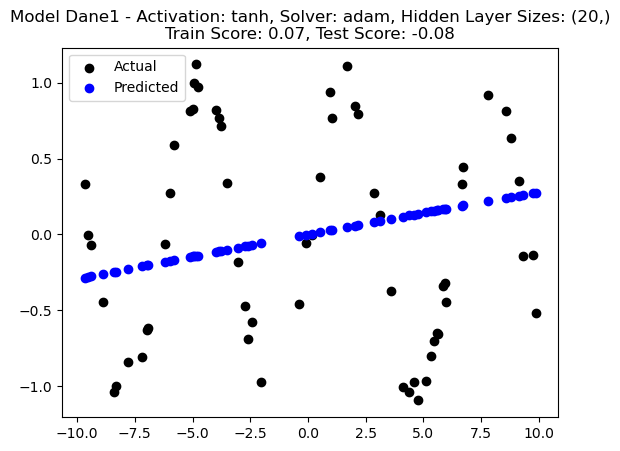

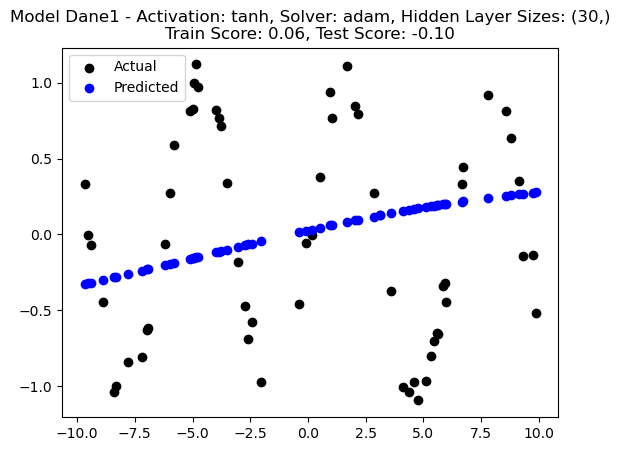

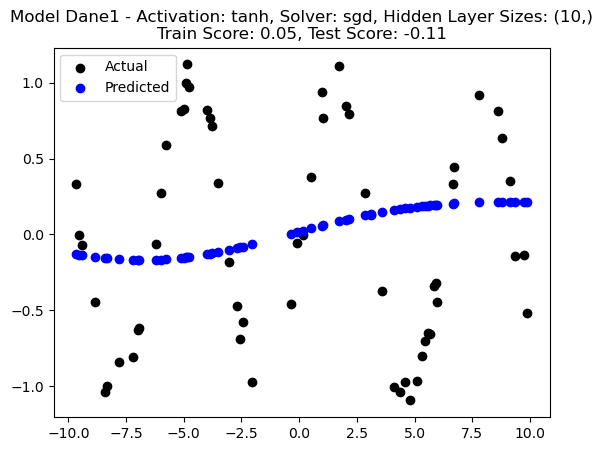

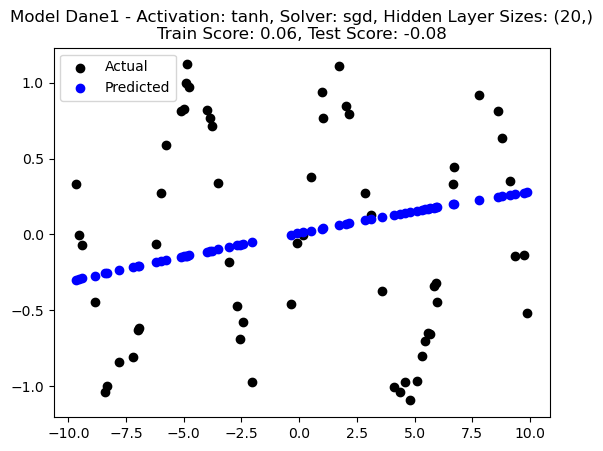

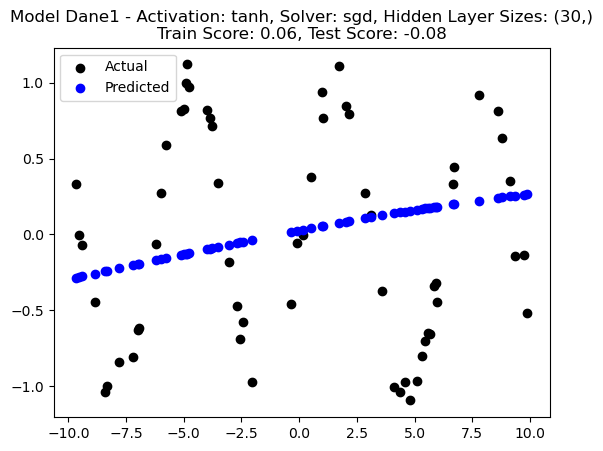

In [12]:
for activation in activations:
    for solver in solvers:
        for hidden_layer_sizes in hidden_layer_sizes_values:
            model, train_score, test_score = train_evaluate_model(X1_train_scaled, y1_train, X1_test_scaled, y1_test, activation, solver, hidden_layer_sizes)
            
            plt.scatter(X1_test, y1_test, color='black', label='Actual')
            plt.scatter(X1_test, model.predict(X1_test_scaled), color='blue', label='Predicted')
            plt.title(f'Model Dane1 - Activation: {activation}, Solver: {solver}, Hidden Layer Sizes: {hidden_layer_sizes}\nTrain Score: {train_score:.2f}, Test Score: {test_score:.2f}')
            plt.legend()
            plt.show()

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


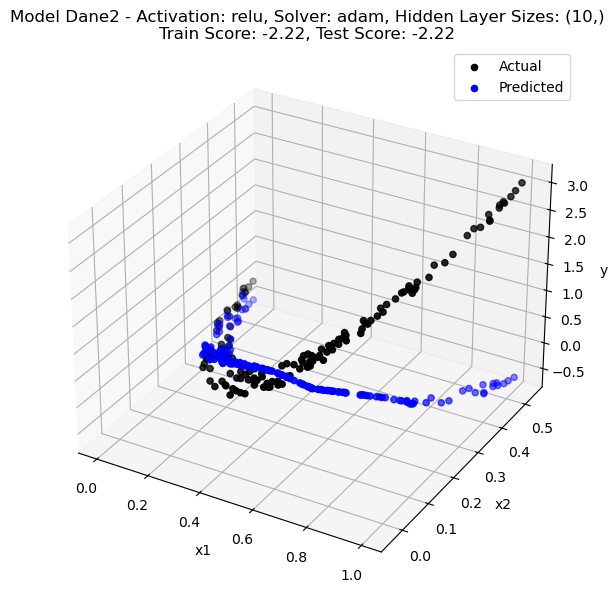

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


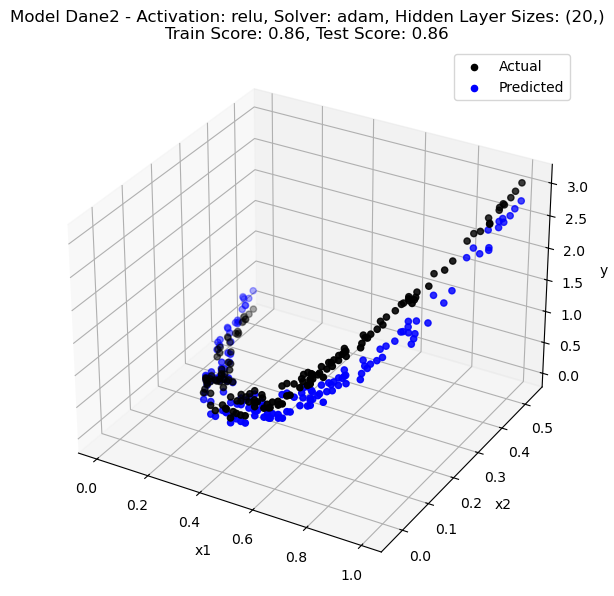

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


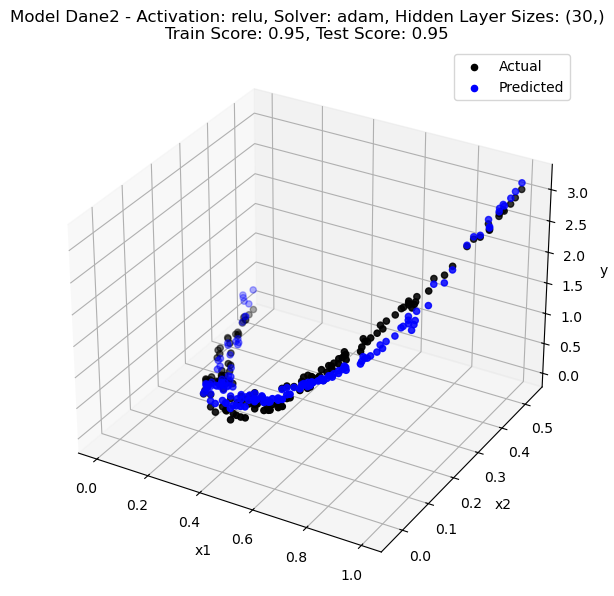

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


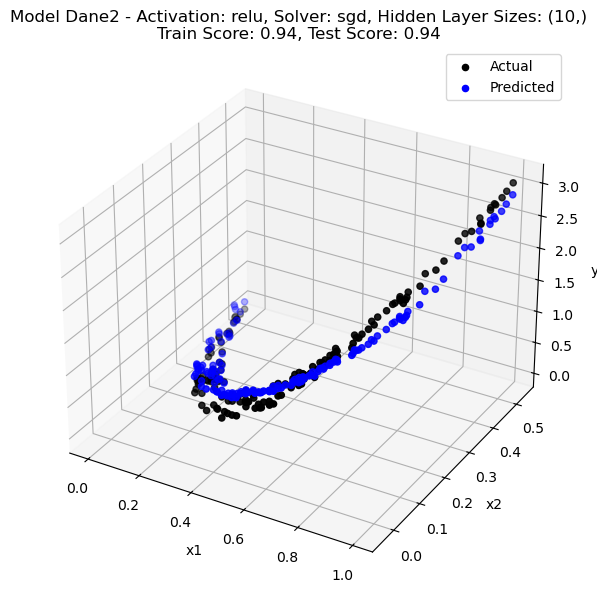

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


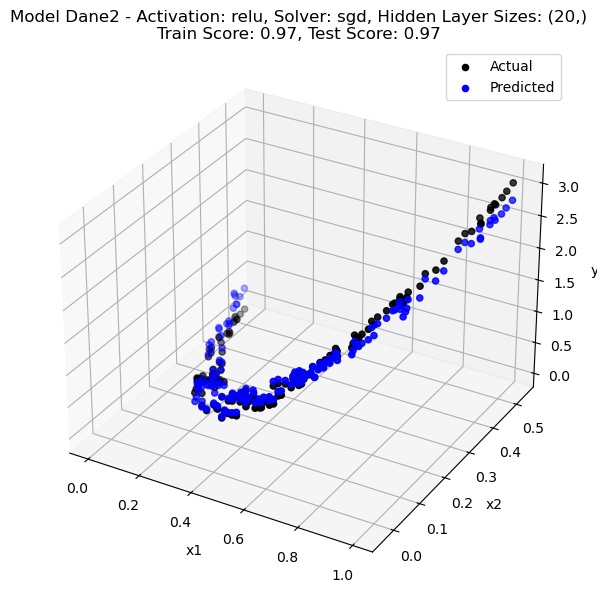

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


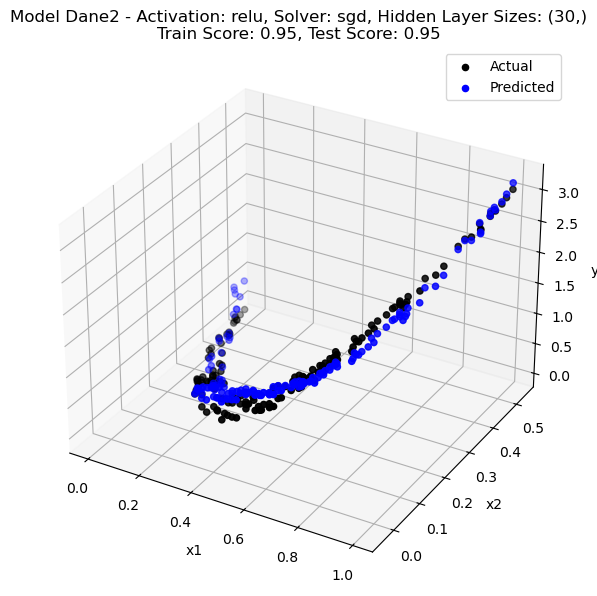

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


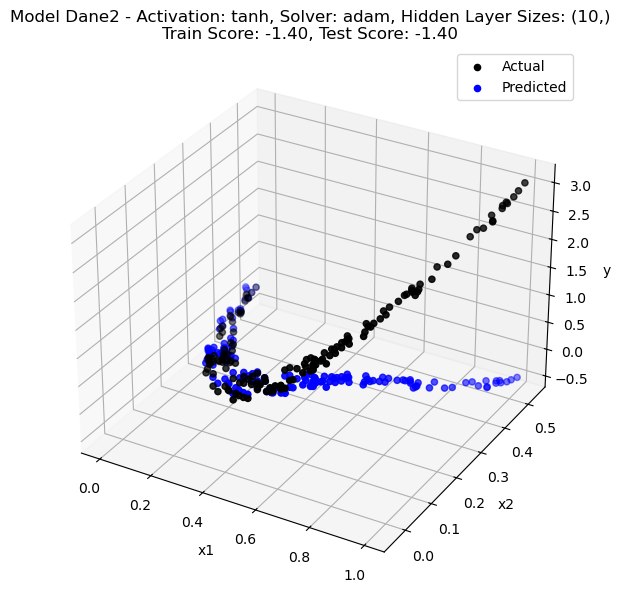

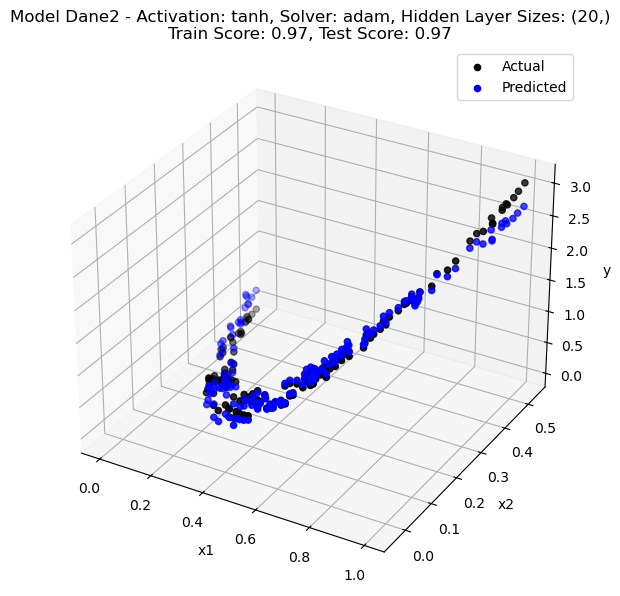

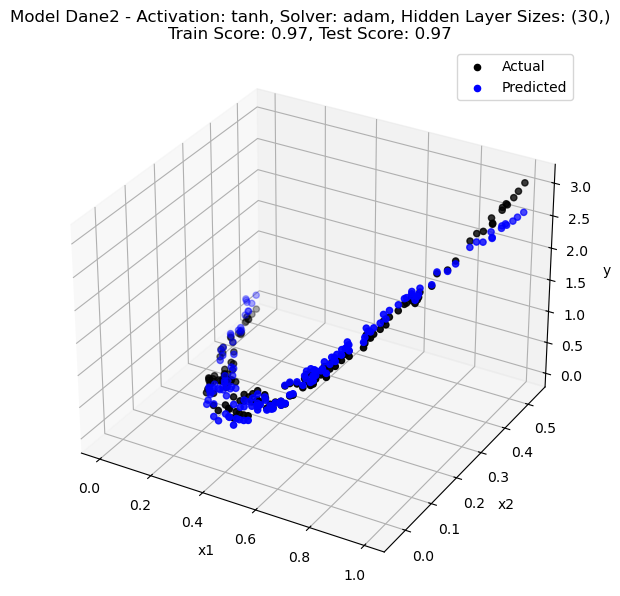

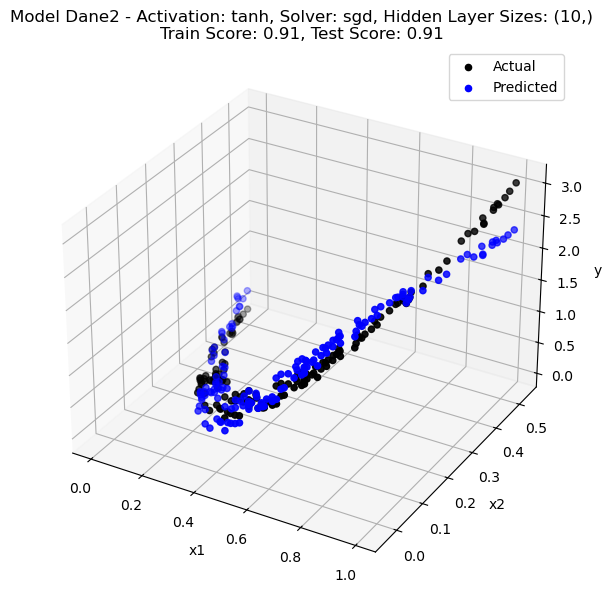

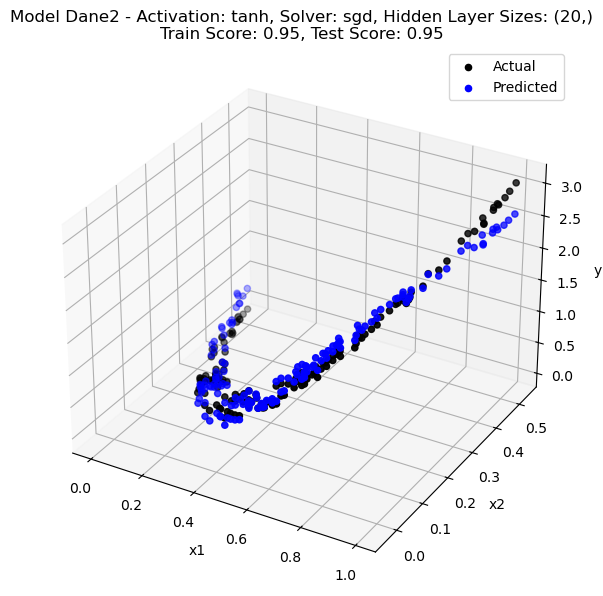

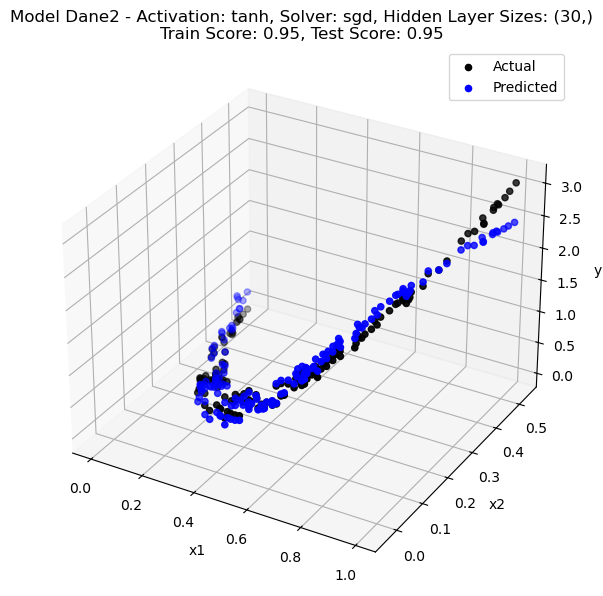

In [13]:
for activation in activations:
    for solver in solvers:
        for hidden_layer_sizes in hidden_layer_sizes_values:
            model, train_score, test_score = train_evaluate_model(X2_scaled, y2, X2_scaled, y2, activation, solver, hidden_layer_sizes)
            
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X2['x1'], X2['x2'], y2, color='black', label='Actual')
            ax.scatter(X2['x1'], X2['x2'], model.predict(X2_scaled), color='blue', label='Predicted')
            ax.set_title(f'Model Dane2 - Activation: {activation}, Solver: {solver}, Hidden Layer Sizes: {hidden_layer_sizes}\nTrain Score: {train_score:.2f}, Test Score: {test_score:.2f}')
            ax.set_xlabel('x1')
            ax.set_ylabel('x2')
            ax.set_zlabel('y')
            plt.legend()
            plt.show()

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


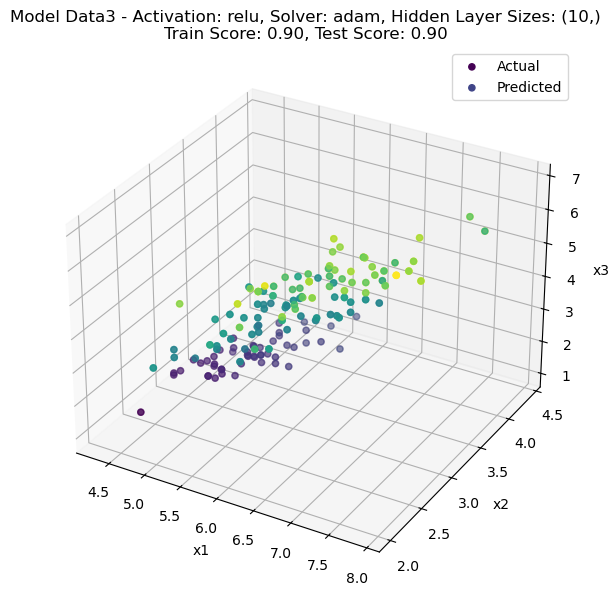

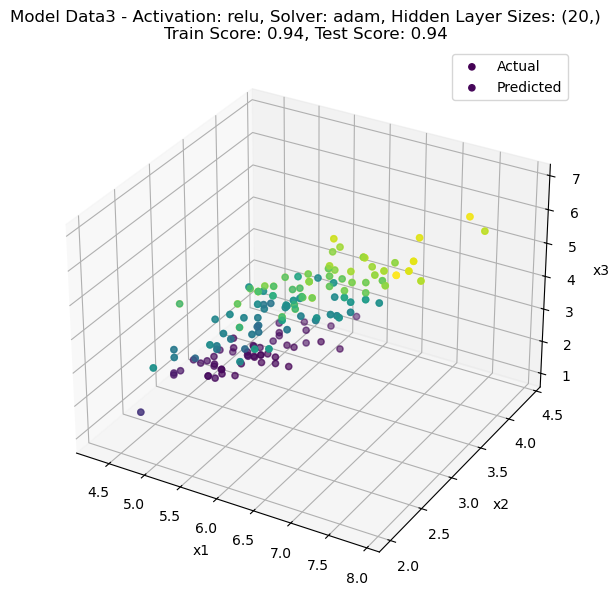

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


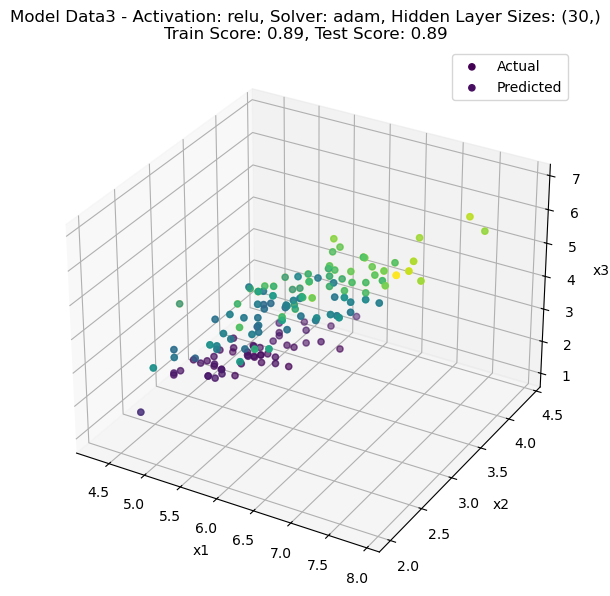

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


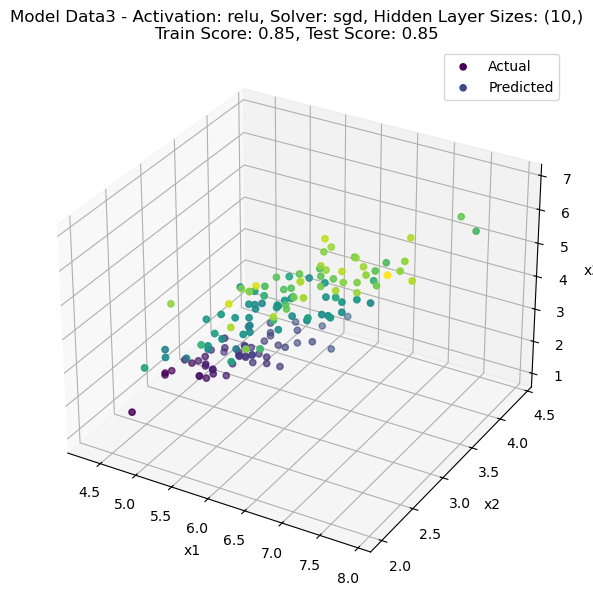

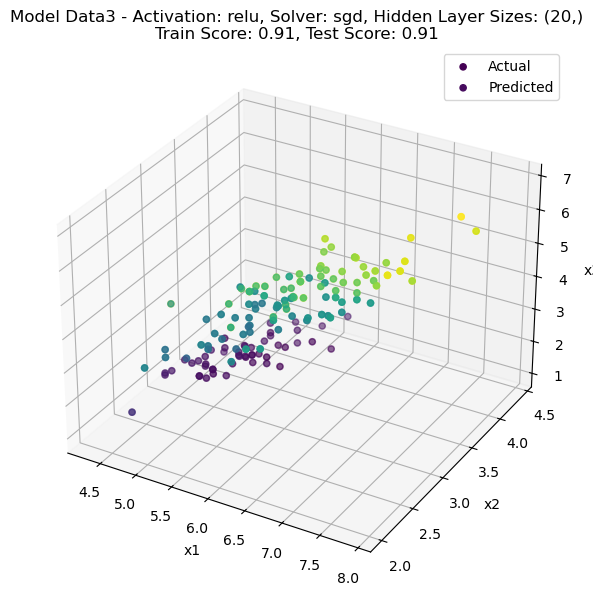

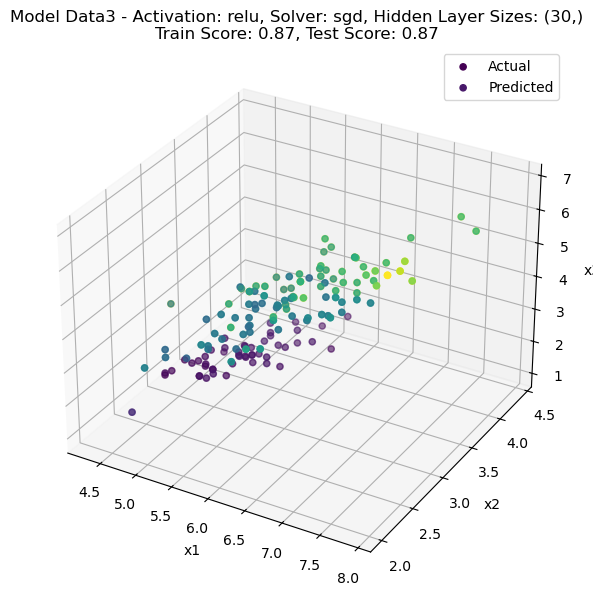

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


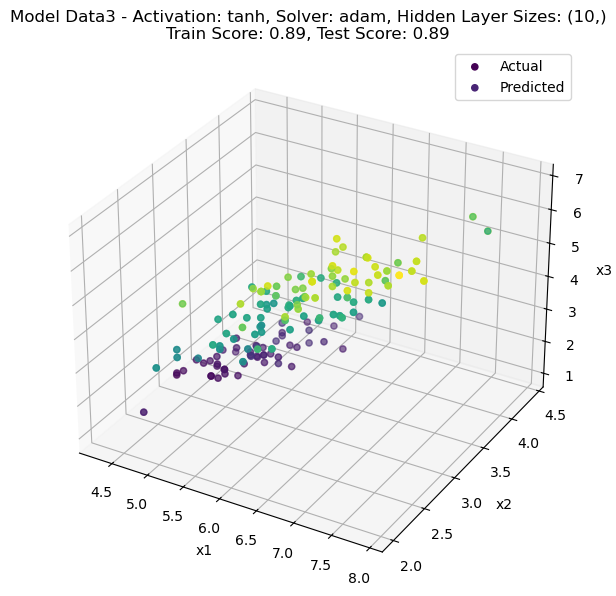

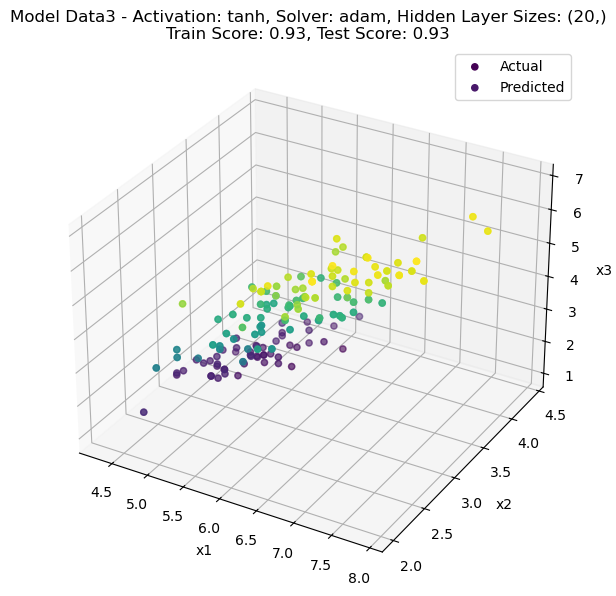

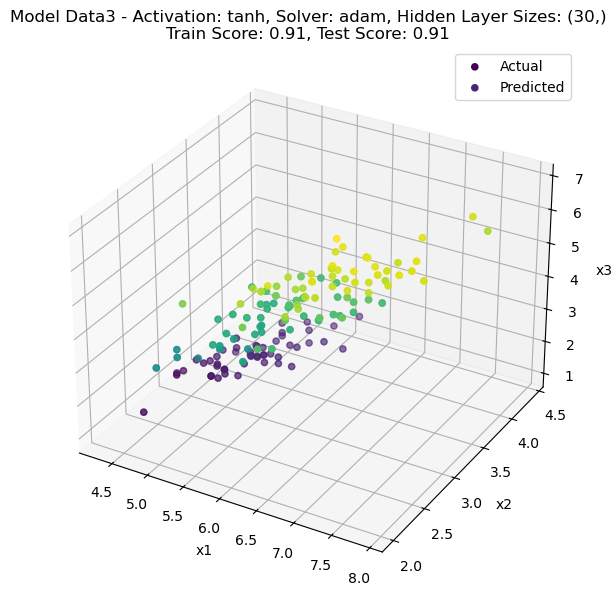

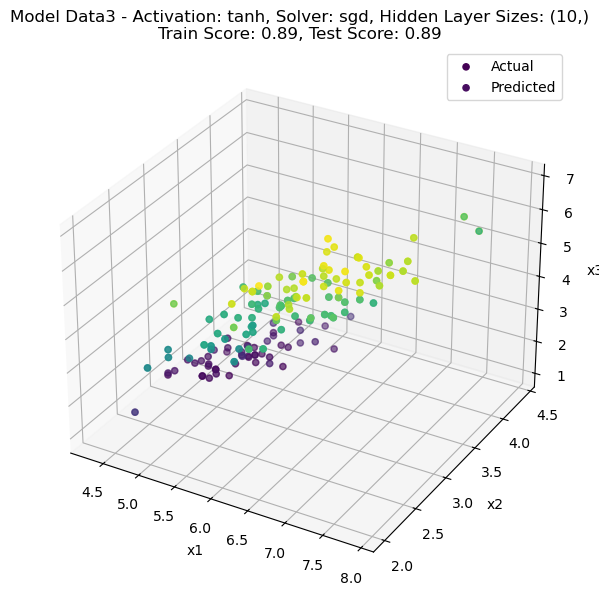

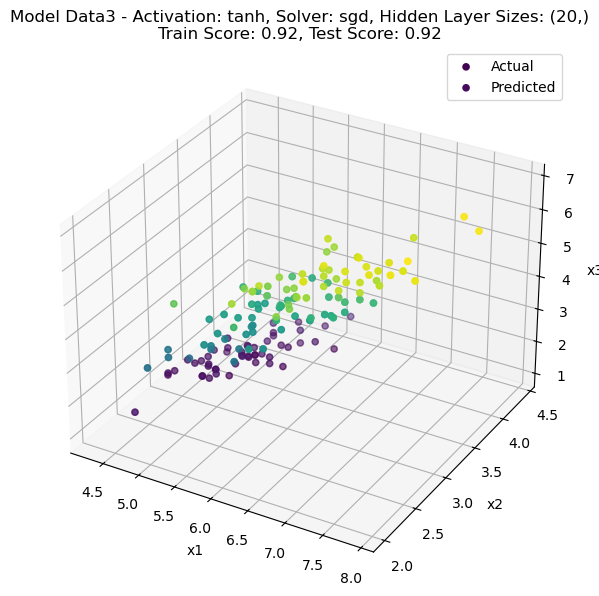

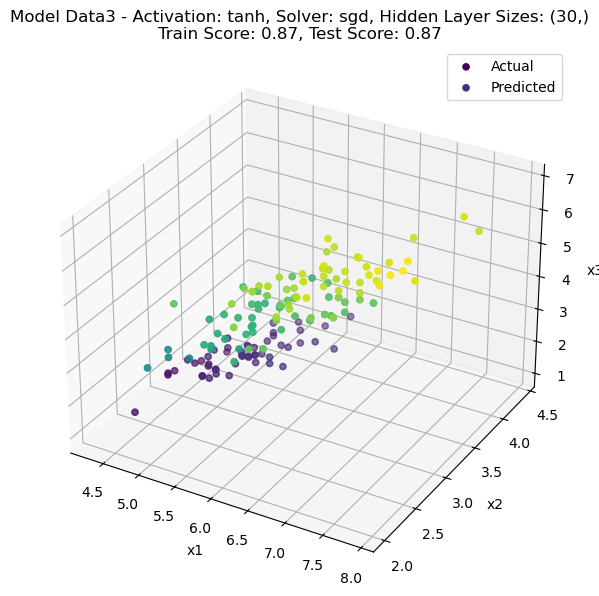

In [14]:
for activation in activations:
    for solver in solvers:
        for hidden_layer_sizes in hidden_layer_sizes_values:
            model, train_score, test_score = train_evaluate_model(X3_scaled, y3, X3_scaled, y3, activation, solver, hidden_layer_sizes)
            
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X3['x1'], X3['x2'], X3['x3'], c=y3, cmap='viridis', label='Actual')
            ax.scatter(X3['x1'], X3['x2'], X3['x3'], c=model.predict(X3_scaled), cmap='viridis', label='Predicted')
            ax.set_title(f'Model Data3 - Activation: {activation}, Solver: {solver}, Hidden Layer Sizes: {hidden_layer_sizes}\nTrain Score: {train_score:.2f}, Test Score: {test_score:.2f}')
            ax.set_xlabel('x1')
            ax.set_ylabel('x2')
            ax.set_zlabel('x3')
            plt.legend()
            plt.show()